In [44]:
from pymongo import MongoClient

HOST="daferre.otdyziw.mongodb.net"
PORT=27017
USERNAME="xuwira02"
PASSWORD="abc123."

if HOST == 'localhost':
    if not USERNAME:
        cli_mongo = MongoClient(HOST, PORT)
    else:
        cli_mongo = MongoClient(HOST, PORT, USERNAME, PASSWORD)
else:
    cli_mongo = MongoClient(f"mongodb+srv://{USERNAME}:{PASSWORD}@{HOST}/test")



In [45]:
coviddb=cli_mongo['covid-italia']
db_covid=coviddb.list_collection_names()
covid=coviddb['covid']

In [55]:
import pandas as pd
df = pd.DataFrame(list(covid.find()))
df


,_id,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,codice_nuts_1,codice_nuts_2,codice_nuts_3
0,65de4520c0335f9441a54928,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,None,None,None,None
1,65de4520c0335f9441a5492c,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,None,NaN,NaN,0,None,None,None,None
2,65de4520c0335f9441a5492f,2020-02-24T18:00:00,ITA,17,Basilicata,980,In fase di definizione/aggiornamento,None,NaN,NaN,0,None,None,None,None
3,65de4520c0335f9441a54936,2020-02-24T18:00:00,ITA,15,Campania,61,Caserta,CE,41.074659,14.332405,0,None,None,None,None
4,65de4520c0335f9441a5493d,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,34,Parma,PR,44.801074,10.328350,0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140175,65de454bc0335f9441a76cac,2022-10-08T17:00:00,ITA,10,Umbria,54,Perugia,PG,43.106758,12.388247,280659,None,ITI,ITI2,ITI21
140176,65de454bc0335f9441a76cb3,2022-10-08T17:00:00,ITA,5,Veneto,23,Verona,VR,45.438390,10.993527,414746,None,ITH,ITH3,ITH31
140177,65de454bc0335f9441a76cb4,2022-10-08T17:00:00,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,411235,None,ITH,ITH3,ITH32
140178,65de454bc0335f9441a76cb6,2022-10-08T17:00:00,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,419455,None,ITH,ITH3,ITH34


# Casos totales segun la longitud y latitud

<Axes: xlabel='lat', ylabel='long'>

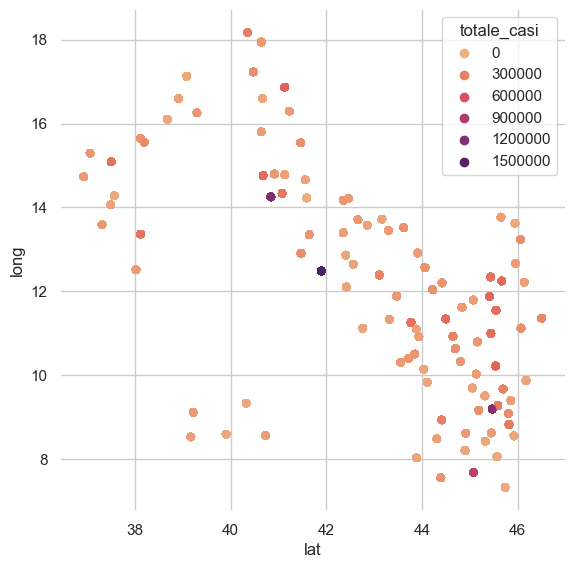

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="lat", y="long",
                hue="totale_casi",
                palette="flare",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

# Total de casos por codigo de la region

c:\Users\david.fernandezrebor\AppData\Local\miniconda3\envs\bigdata\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


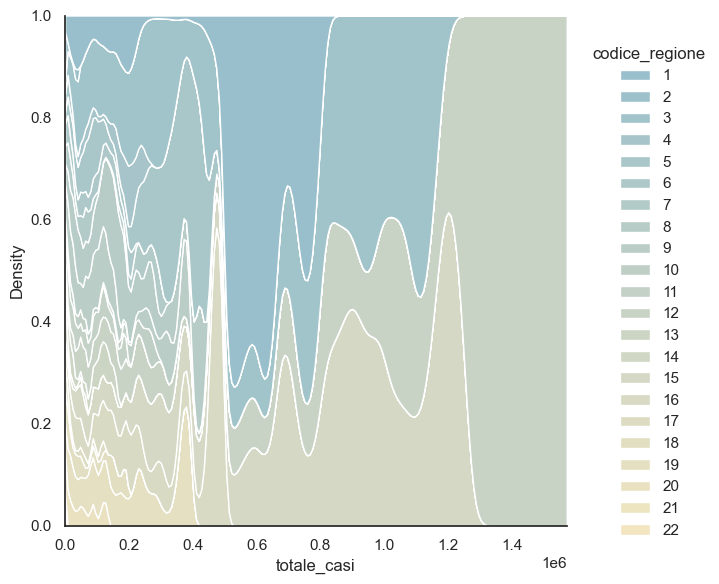

In [49]:
sns.set_theme(style="white")
sns.displot(
    data=df,
    x="totale_casi", hue="codice_regione",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="blend:#7AB,#EDA",
)

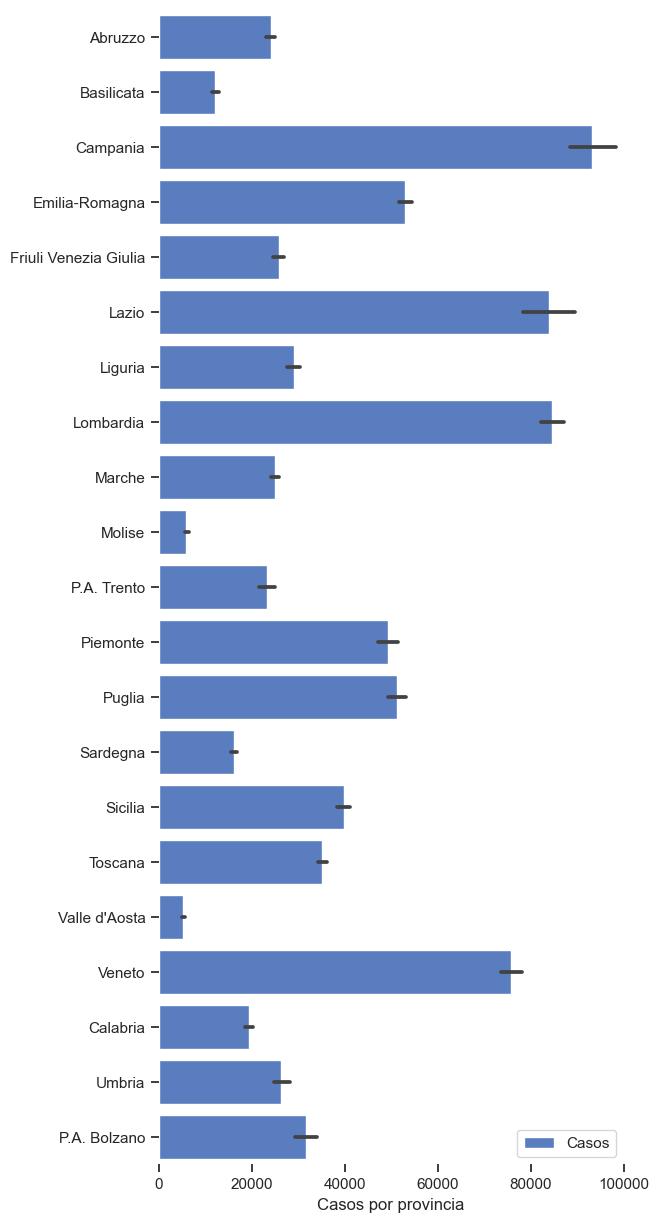

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("muted")
sns.barplot(x="totale_casi", y="denominazione_regione", data=df,
            label="Casos", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100000), ylabel="",
       xlabel="Casos por provincia")
sns.despine(left=True, bottom=True)